In [1]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import pandas as pd
import seaborn as sns

In [2]:
# Read csv file
obese_df = pd.read_csv("https://raw.githubusercontent.com/owlbemi/CS4372Assignment2/main/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# Dataset head
obese_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for null values
obese_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# Check values for target variable
obese_df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
# Convert target variable to numerical
obese_df["NObeyesdad"].replace(["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", 
                                "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"], 
                               [0,1,2,3,4,5,6], inplace=True)

In [8]:
obese_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [9]:
# Convert features to categorical
obese_df["Gender"] = obese_df.Gender.astype('category')
obese_df["family_history_with_overweight"] = obese_df.family_history_with_overweight.astype('category')
obese_df["FAVC"] = obese_df.FAVC.astype('category')
obese_df["CAEC"] = obese_df.CAEC.astype('category')
obese_df["SMOKE"] = obese_df.SMOKE.astype('category')
obese_df["SCC"] = obese_df.SCC.astype('category')
obese_df["CALC"] = obese_df.CALC.astype('category')
obese_df["MTRANS"] = obese_df.MTRANS.astype('category')

In [11]:
# Split data into features and target
y = obese_df["NObeyesdad"]
X = obese_df.drop("NObeyesdad", axis=1)

# Use Target Encoding to convert categorical features
encoder = TargetEncoder(cols=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
X_encoded = encoder.fit_transform(X,y)

In [13]:
# Check mean and standard deviation for each feature
X_encoded.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,3.050687,24.312600,1.701677,86.586058,3.050687,3.050687,2.419043,2.685628,3.054633,3.051405,2.008011,3.050722,1.010298,0.657866,3.052272,3.064738
std,0.262642,6.345968,0.093305,26.191172,0.549110,0.442937,0.533927,0.778039,0.544418,0.055540,0.612953,0.338390,0.850592,0.608927,0.456884,0.394952
min,2.791199,14.000000,1.450000,39.000000,1.888312,1.828571,1.000000,1.000000,0.963765,2.670824,1.000000,1.500776,0.000000,0.000000,1.581329,1.054542
25%,2.791199,19.947192,1.630000,65.473343,3.309965,3.211147,2.000000,2.658738,3.273088,3.059507,1.584812,3.124566,0.124505,0.000000,2.550861,2.733042
50%,2.791199,22.777890,1.700499,83.000000,3.309965,3.211147,2.385502,3.000000,3.273088,3.059507,2.000000,3.124566,1.000000,0.625350,3.354747,3.237975
75%,3.316395,26.000000,1.768464,107.430682,3.309965,3.211147,3.000000,3.000000,3.273088,3.059507,2.477420,3.124566,1.666678,1.000000,3.354747,3.237975
max,3.316395,61.000000,1.980000,173.000000,3.309965,3.211147,3.000000,4.000000,3.273088,3.059507,3.000000,3.124566,3.000000,2.000000,3.354747,3.237975


In [14]:
# Standardize dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [15]:
# Check mean and standard deviation of scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,1.407159e-15,-4.823567e-16,-6.476213e-16,-1.786349e-15,3.907606e-17,8.490550e-15,2.861020e-16,-6.844359e-16,9.238149e-15,-4.106037e-15,3.811888e-16,4.977623e-15,2.325105e-16,-8.107757e-17,1.397482e-15,2.621936e-15
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-9.882266e-01,-1.625448e+00,-2.698006e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-3.841469e+00,-6.853997e+00,-1.644905e+00,-4.581439e+00,-1.188039e+00,-1.080625e+00,-3.220274e+00,-5.090930e+00
25%,-9.882266e-01,-6.880656e-01,-7.683883e-01,-8.062914e-01,4.722913e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,4.013593e-01,1.459003e-01,-6.905894e-01,2.182720e-01,-1.041630e+00,-1.080625e+00,-1.097719e+00,-8.400385e-01
50%,-9.882266e-01,-2.418974e-01,-1.263207e-02,-1.369510e-01,4.722913e-01,3.623491e-01,-6.283450e-02,4.041527e-01,4.013593e-01,1.459003e-01,-1.307326e-02,2.182720e-01,-1.210937e-02,-5.341135e-02,6.621943e-01,4.387322e-01
75%,1.011914e+00,2.659641e-01,7.159595e-01,7.960531e-01,4.722913e-01,3.623491e-01,1.088342e+00,4.041527e-01,4.013593e-01,1.459003e-01,7.659959e-01,2.182720e-01,7.718565e-01,5.619968e-01,6.621943e-01,4.387322e-01
max,1.011914e+00,5.782584e+00,2.983646e+00,3.300136e+00,4.722913e-01,3.623491e-01,1.088342e+00,1.689740e+00,4.013593e-01,1.459003e-01,1.618759e+00,2.182720e-01,2.339750e+00,2.204618e+00,6.621943e-01,4.387322e-01


In [18]:
# Combine X and y into new dataframe
obese_scaled = pd.concat([X_scaled, y], axis=1)

# Dataset head
obese_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.401359,0.145900,-0.013073,0.218272,-1.188039,0.561997,-1.097719,0.438732,0
1,1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.401359,-6.853997,1.618759,-4.581439,2.339750,-1.080625,0.662194,0.438732,0
2,-0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.401359,0.145900,-0.013073,0.218272,1.163820,0.561997,-3.220274,0.438732,0
3,-0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.401359,0.145900,-0.013073,0.218272,1.163820,-1.080625,-3.220274,-5.090930,1
4,-0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.401359,0.145900,-0.013073,0.218272,-1.188039,-1.080625,0.662194,0.438732,2


<Axes: >

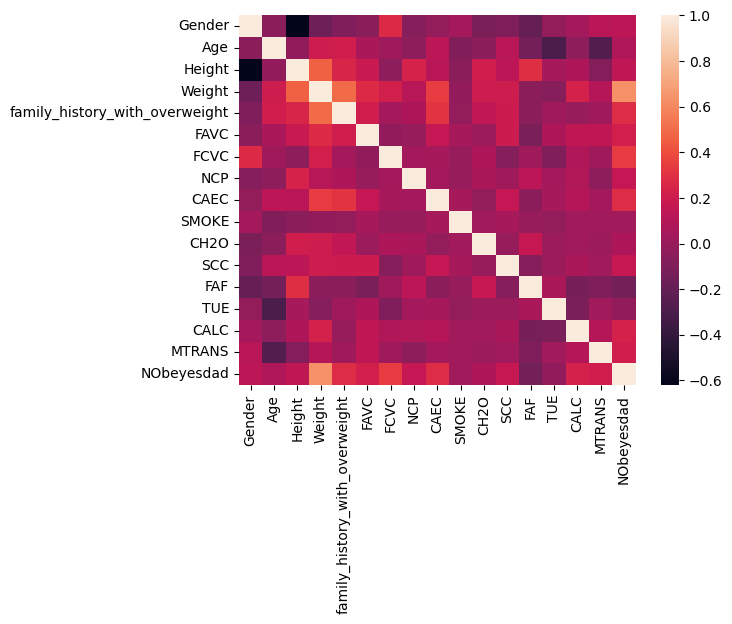

In [22]:
# Create a correlation heatmap
corr_matrix = obese_scaled.corr().round(2)
sns.heatmap(data=corr_matrix)